<a href="https://colab.research.google.com/github/Guadalescano/Curso-Data-Science/blob/main/Notebook_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa Ingenias+ Data Science

## ✏️ Ejercitación: Procesamiento y transformación de datos

Esta notebook les permitiria ejercitar los conceptos de Pandas 🐼  y Procesamiento de datos 📊 que aprendimos hasta ahora. Vamos a seguir trabajando con el dataset que contiene datos relativos a [clientes de un centro comercial](https://www.kaggle.com/akram24/mall-customers) que guardamos en la Notebook 10 luego de eliminar valores faltantes y filtrar outliers.

### 🛠 Procesando datos para ML- Feature Engeneering 🔧

Una vez que visualizamos y exploramos el dataset tenemos una idea de como lucen nuestros datos. Es por eso que ahora debemos empezar a preparar nuestros datos para los siguientes pasos según lo que aprendimos de ellos y las preguntas que nos planteamos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
clientes = pd.read_csv('https://raw.githubusercontent.com/BrennGonzalez/Notebooks/refs/heads/main/Mall_Customers.csv')


In [3]:
clientes.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
clientes.dtypes

,0
CustomerID,int64
Genre,object
Age,int64
Annual Income (k$),int64
Spending Score (1-100),int64


In [5]:
clientes.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
print(clientes)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [7]:
clientes.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
from sklearn.preprocessing import MinMaxScaler #Se importa el minmaxscaler

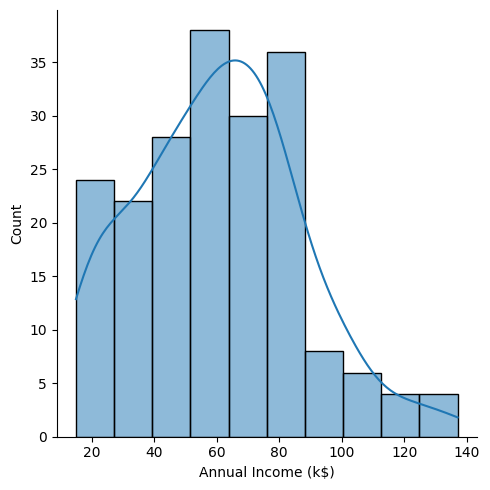

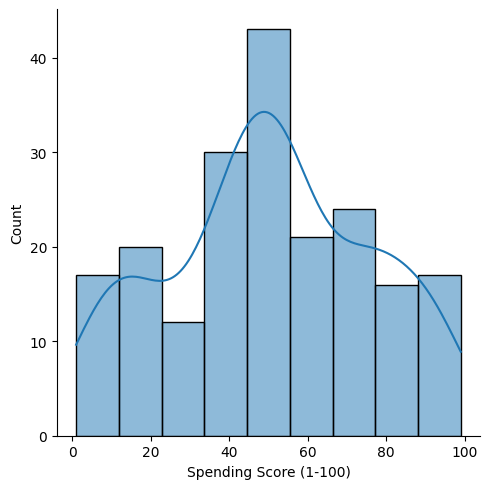

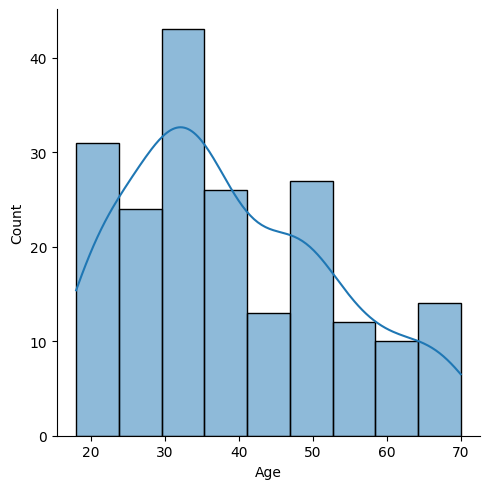

In [9]:
sns.displot(clientes['Annual Income (k$)'], kde=True)
sns.displot(clientes['Spending Score (1-100)'], kde=True)
sns.displot(clientes['Age'], kde=True)



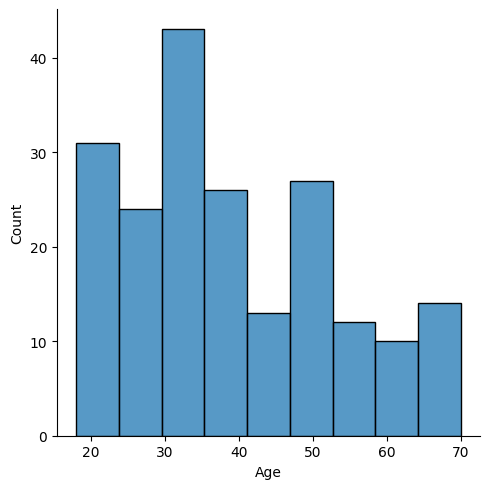

In [10]:
sns.displot(clientes['Age'])

#### DESCUBRIENDO NUEVAS VARIABLES

🤔 &nbsp; **_¿Puedo generar nuevas variables a través de las ya presentes? ¿Qué aportaría al entendimiento de los datos la creación de esta/s variable/s?_**

In [15]:
q3 = clientes['Spending Score (1-100)'].quantile(0.75)

clientes_sobreq3=clientes[(clientes['Spending Score (1-100)'] > q3)]

num_customers = len(clientes_sobreq3)  # Using len() cuento el numero de customers

print("Número de clientes con puntaje de gasto entre 73 y 100:", num_customers)

q3 = clientes['Spending Score (1-100)'].quantile(0.75)

clientes_sobreq3=clientes[(clientes['Spending Score (1-100)'] > q3)]

num_customers = len(clientes_sobreq3)  # Using len()

print("Número de clientes con puntaje de gasto entre 73 y 100:", num_customers)

print(clientes_sobreq3)
print("")

print(f"Edad media de los clientes con puntaje de gasto entre 73 y 100: {clientes_sobreq3['Age'].mean()} años")

print("")

print(f"Ingresos de los clientes con puntaje de gasto entre 73 y 100: {clientes_sobreq3['Annual Income (k$)'].mean()} k$")


Número de clientes con puntaje de gasto entre 73 y 100: 45
Número de clientes con puntaje de gasto entre 73 y 100: 45
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
1             2    Male   21                  15                      81
3             4  Female   23                  16                      77
5             6  Female   22                  17                      76
7             8  Female   23                  18                      94
11           12  Female   35                  19                      99
13           14  Female   24                  20                      77
15           16    Male   22                  20                      79
19           20  Female   35                  23                      98
25           26    Male   29                  28                      82
29           30  Female   23                  29                      87
33           34    Male   18                  33                      92
35    

In [26]:
# Crear grupos etarios
clientes['Grupo_Edad'] = pd.cut(clientes['Age'], bins=[18, 25, 35, 50, 70], labels=['18-25', '26-35', '36-50', '51+'])

grouped_data = clientes.groupby('Grupo_Edad', observed=False)[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
grouped_data = grouped_data.rename(columns={
    'Annual Income (k$)': 'Promedio_Annual_Income',
    'Spending Score (1-100)': 'Promedio_Spending_Score'})
grouped_data['Customer_Count'] = clientes['Grupo_Edad'].value_counts().sort_index()
print(grouped_data)


            Promedio_Annual_Income  Promedio_Spending_Score  Customer_Count
Grupo_Edad                                                                 
18-25                    45.029412                54.352941              34
26-35                    68.150000                64.450000              60
36-50                    66.661290                41.709677              62
51+                      53.850000                37.475000              40


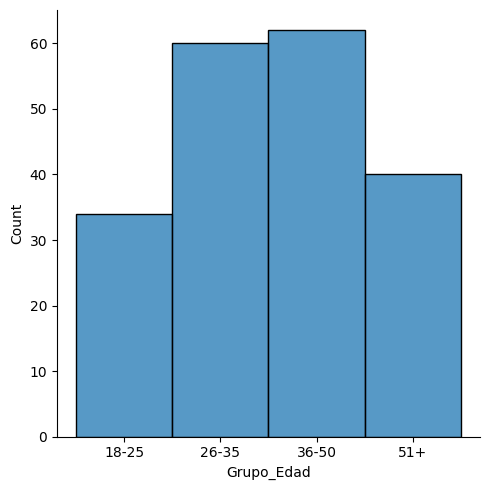

In [18]:
sns.displot(clientes['Grupo_Edad'])

#### ESTANDARIZACION DE DATOS

🤔 &nbsp; **_¿Crees que tus variables deben ser estandarizadas?_**

Si es así, elige una estrategia y aplicala

🚀 _Recuerda qué_ vimos dos metodos para estandarizar o reescalar variables: `StandardScaler` que usa z-score y `MinMaxScaler` que reescala los datos linealmente. Lee la documentación para [Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) y para [Min Max](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

- En una situación en la vida real, este paso podríamos realizarlo ahora, ya que ya sabriamos que algoritmo queremos usar o pregunta nos queremos contenstar. En el contexto del curso, en la clase 6 aún no hemos visto aprendizaje automatico. Por lo cual, si no consideraron realizar un scaling esta bien. Podrán hacerlo en el ejercicio de la clase 8, que utilizaremos este dataset.

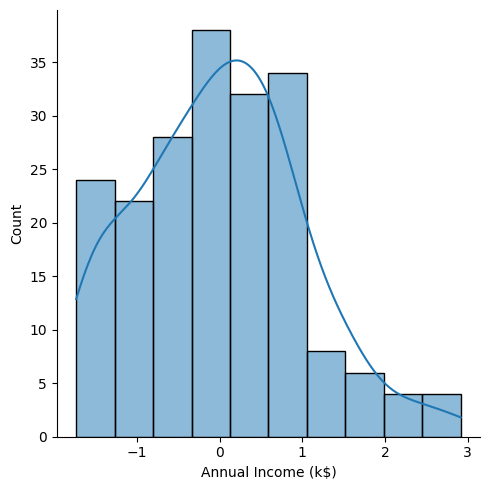

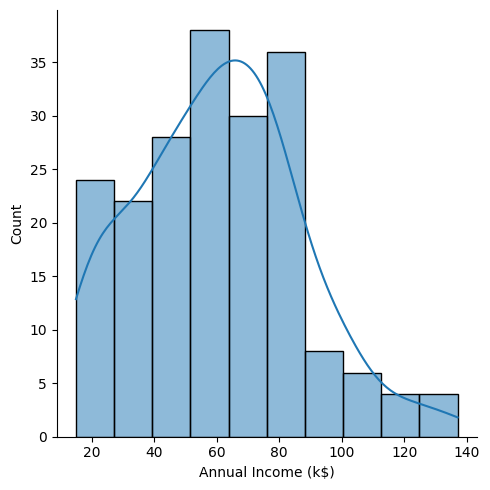

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las variables numéricas a escalar
variables_a_escalar = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

scaler = StandardScaler()

clientes_scaled = clientes.copy()

clientes_scaled[variables_a_escalar] = scaler.fit_transform(clientes[variables_a_escalar])

# Ver la distribución luego del escalado
sns.displot(clientes_scaled['Annual Income (k$)'], kde=True)


sns.displot(clientes['Annual Income (k$)'], kde=True)

#### TRANSFORMACION DE VARIABLES

🤔 &nbsp; **¿Tienes variables categoricas en tu dataset? ¿Estan representadas por números o por strings? ¿Crees que debes generar variables dummies o realizar un encoding de las categorias?**

🚀 _Recuerda qué_ hablamos de varias funciones para poder llevar a cabo estas transformaciones. Algunas de ellas como `get_dummies` y `map` pertenecen a `pandas`, mientras que otras como `LabelEncoder` y `OneHotEncoder` son parte de `sklearn`.

Si queres saber más, chequea la documentación de [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html), [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html), [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) y [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

#### 💾 &nbsp; GUARDANDO EL ARCHIVO PARA LOS SIGUIENTES PASOS

1) **Utiliza la función `.to_csv()` para guardar tu dataset**.